# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle that contains information on 3 million used cars.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

- The goal of this project is to understand the history of sales for used cars and predict the pricing of cars.
- The data will need to be defined, manipulated and cleaned to start building the model.
- The model should deliver predict the future consumer pricing.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

from scipy import stats
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline, make_pipeline
import category_encoders as ce

In [10]:
data = pd.read_csv("data/vehicles.csv")

In [ ]:
data.info()

In [12]:
data.sample(30)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
29236,7312430441,humboldt county,20000,2012.0,ram,1500,excellent,8 cylinders,gas,92185.0,clean,automatic,NaN,4wd,full-size,truck,white,ca
74828,7305413596,colorado springs,1,2009.0,lexus,rx350,excellent,6 cylinders,gas,147800.0,clean,automatic,2T2GK31U29CO78595,4wd,sub-compact,SUV,grey,co
200449,7315365690,grand rapids,11985,2015.0,dodge,journey,NaN,NaN,gas,109850.0,clean,automatic,3C4PDDFG3FT522227,NaN,NaN,SUV,grey,mi
406609,7307904129,olympic peninsula,27999,2014.0,jeep,wrangler,NaN,NaN,gas,41187.0,clean,manual,1C4AJWAG6EL116924,4wd,NaN,SUV,silver,wa
396101,7314770291,richmond,37500,1938.0,chevrolet,NaN,NaN,NaN,gas,6000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,va
187276,7314646234,boston,7995,2012.0,honda,civic,excellent,NaN,gas,131000.0,clean,automatic,2HGFG3B88CH563857,fwd,NaN,coupe,black,ma
205307,7302181468,kalamazoo,7900,2014.0,dodge,journey,NaN,NaN,gas,205981.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,mi
412252,7315841504,yakima,8725,2014.0,nissan,maxima 3.5 s,good,6 cylinders,gas,71024.0,rebuilt,automatic,NaN,fwd,NaN,sedan,black,wa
318689,7313572845,klamath falls,34800,2015.0,ford,super duty f-250 srw laria,NaN,8 cylinders,gas,132291.0,clean,automatic,1FT7W2B61FEB34568,4wd,NaN,truck,NaN,or
105187,7314981720,orlando,0,2008.0,chevrolet,hhr,NaN,NaN,gas,212640.0,clean,automatic,3GNDA53P28S615410,NaN,NaN,SUV,red,fl


In [13]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


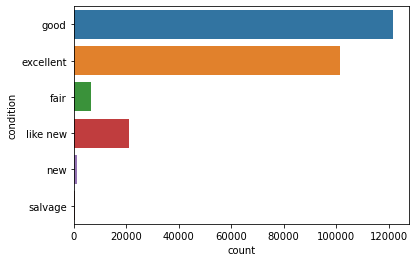

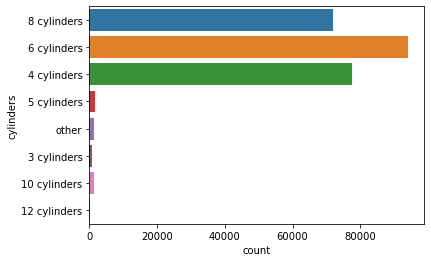

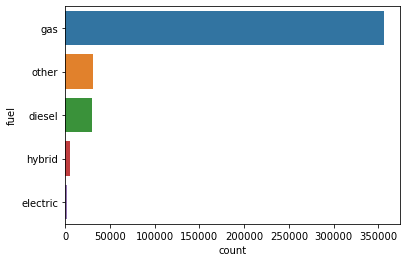

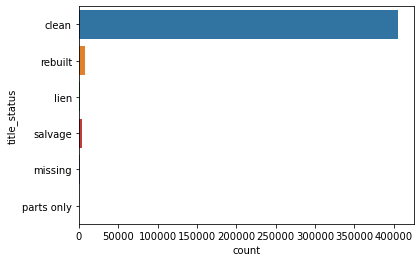

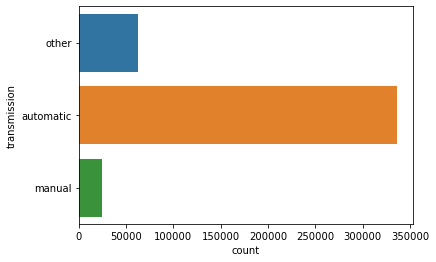

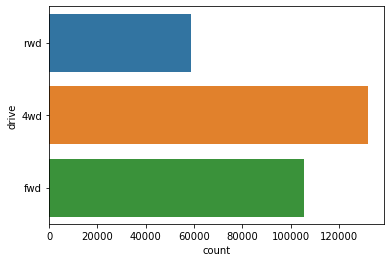

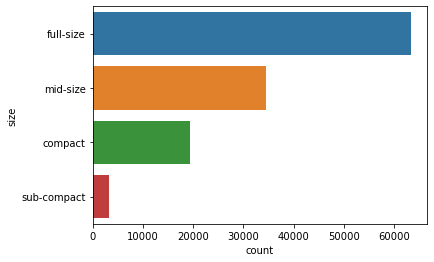

In [14]:
for column in data.select_dtypes(include=object):
    if data[column].nunique() < 11:
        sns.countplot(y=column, data=data)
        plt.show()

#### A few notes about the data
There aren't a lot of data for hybrid cars, new & fair conditions, 3 5 and 10 cylinder cars.
The title column won't tell us too much about the car since most of the data is in clean.
Most cars are in automatic transmission.


In [ ]:
sns.pairplot(data)

In [ ]:
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

I can't really see any high correlation here. Let's plot all the histograms

In [ ]:
import plotly.express as px
for column in data:
        fig=px.histogram(data, x=column)
        fig.show()


In [ ]:
#encode to change it from object to integer
label_encoder= preprocessing.LabelEncoder()
data_encoded= data
for column in data_encoded.select_dtypes(include=object):
    data_encoded[column]=label_encoder.fit_transform(data_encoded[column])
    
data_encoded.head()

In [ ]:
sns.pairplot(data_encoded)

In [10]:
for column in data:
    print("Unique # of",column ,data[column].nunique())

Unique # of id 426880
Unique # of region 404
Unique # of price 15655
Unique # of year 114
Unique # of manufacturer 43
Unique # of model 29650
Unique # of condition 7
Unique # of cylinders 9
Unique # of fuel 6
Unique # of odometer 104870
Unique # of title_status 7
Unique # of transmission 4
Unique # of VIN 118247
Unique # of drive 4
Unique # of size 5
Unique # of type 14
Unique # of paint_color 13
Unique # of state 51


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Notes about the data

- I will remove ID and VIN number from the dataset because it is not necessary for modeling. Also, most of the size column is missing so that will likely be dropped as well. I will also drop model column, there are too many unique values (29650) to make a concrete observation.
- Remove null values
- There are no duplicate entries
- There are currently 4 numeric features and I intend to change year and odometer to integers. 
- Remove outliers. As seen from the histograms the price, odometer and years have a very large range


In [97]:
car_data=data.drop(["VIN", "id", "size", "model"], axis=1, inplace=False)


In [ ]:
car_data.info()

In [ ]:
# Remove the null values in year and odometer columns 
# remember the inplace=true removes the existing dataframe
car_data=car_data.dropna(subset=['year', 'odometer']).reset_index(drop=True)
car_data

In [100]:
car_data=car_data.dropna()

In [ ]:
car_data.info()

In [ ]:
# Change year and price to integer
car_data.year=car_data.year.astype(int)
car_data.price=car_data.price.astype(int)

Z-score is a method for removing outliers (also called standard score). This value helps to understand how far the data point from the mean. 

Z-score=(data_point - mean)/(Std. deviation)

However, in this case I want to use IQR (Inter Quartile Range). 
IQR= Quartile3-Quartile1

In [ ]:
outliers=['price', 'odometer', 'year']
for column in outliers:
    Q1= np.percentile(car_data[column], 25, interpolation='midpoint')
    Q3=np.percentile(car_data[column], 75, interpolation='midpoint')
    IQR=Q3-Q1
    #To define the outlier base valye is defined above and below 
    #datasets normal range (namely upper and lower bounds), define 
    #the upper and lower bound
    upper= (Q3+(1.5*IQR))
    lower=(Q1- (1.5*IQR))
    
    car_data.loc[car_data[column] < lower] =np.nan
    car_data.loc[car_data[column] > upper] =np.nan

In [ ]:
car_data

In [105]:
car_data.shape

(117169, 14)

<AxesSubplot:>

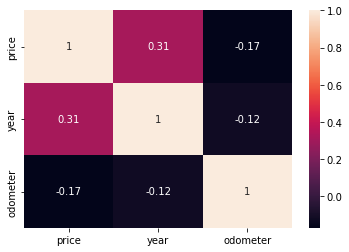

In [78]:
sns.heatmap(car_data.corr(), annot=True)

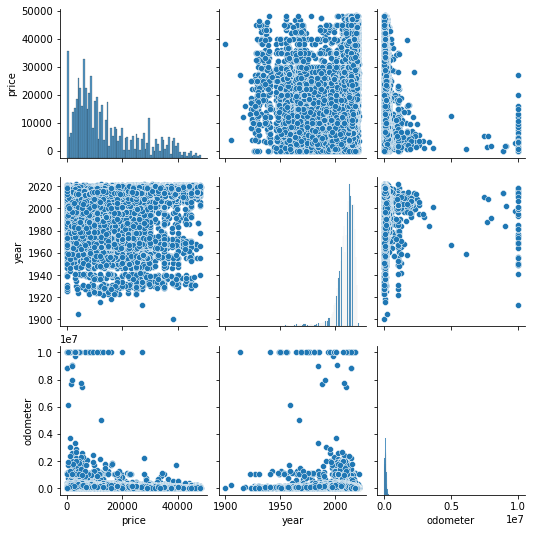

In [79]:
sns.pairplot(data=car_data)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.



Exploring a number of different models, let's start with linear regression
#### Linear Regression

### Target Encoding for categorical variables

In [110]:
max(car_data['odometer'])

10000000.0

In [118]:
car_data=car_data.dropna()

In [119]:
car_data.odometer=car_data.odometer.astype(int)

In [ ]:
scaler=StandardScaler()
transformer = TransformedTargetRegressor(regressor = Ridge())
transformer= TransformedTargetRegressor(regressor=Ridge())
pipe1= Pipeline([("c_transform", ce.TargetEncoder(cols=categories)),
                ('scaler', StandardScaler())])
pipe1.fit(X,y)

In [48]:
from pandas import read_csv # For dataframes
from pandas import DataFrame # For dataframes
from numpy import ravel # For matrices
import matplotlib.pyplot as plt # For plotting data
import seaborn as sns # For plotting data
from sklearn.model_selection import train_test_split # For train/test splits
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV

In [124]:
X_odometer_train, X_odometer_test, y_odometer_train, y_odometer_test=train_test_split(car_data[['odometer']],car_data['price'], test_size=0.2, random_state=0)


In [127]:
scaler=StandardScaler()
transformer = TransformedTargetRegressor(regressor = Ridge())
pipe1= Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
#X_odometer= car_data[['odometer']]
#y_odometer=car_data['price']
pipe1.fit(X_odometer_train, y_odometer_train)

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [129]:
print('Training set score: ' + str(pipe1.score(X_odometer_train,y_odometer_train)))
print('Test set score: ' + str(pipe1.score(X_odometer_test,y_odometer_test)))

Training set score: 0.02733594662672567
Test set score: 0.0333729590943912


In [151]:
param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}
ridge=Ridge()
grid = GridSearchCV(pipe1, param_grid=param_dict)
grid.fit(X_odometer_train, y_odometer_train)

train_preds=grid.predict(X_odometer_train)
test_preds= grid.predict(X_odometer_test)
model_2_train_mse = mean_squared_error(y_odometer_train, train_preds)
model_2_test_mse = mean_squared_error(y_odometer_test, test_preds)
model_2_best_alpha = grid.best_params_

print(f'Test MSE: {model_2_test_mse}')
print(f'Best Alpha: {list(model_2_best_alpha.values())[0]}')
print('Training set score: ' + str(grid.score(X_odometer_train, y_odometer_train)))
print('Test set score: ' + str(grid.score(X_odometer_test, y_odometer_test)))

Test MSE: 130803471.1569274
Best Alpha: 1000.0
Training set score: 0.02733277698013703
Test set score: 0.03320677028410879


### Model just the numerical data 
The purpose of this is to explore building models with numerical data only. 

Steps:
1. Set up a pipeline using the Pipeline object from sklearn.pipeline

Pipelines are used to automate a machine learning workflow. The pipeline can involve pre-processing, feature selection, classification/ regression and post-processing.

2. Perform a grid search for the best parameters using GridSearchCV()

Optimization tunes the model for the best performance. The success of any learning model rests on the selection of the best parameters that give the best possible results. 

3. Analyze the results and visualize

Scaler: For pre-processing data, i.e., transform the data to zero mean and unit variance using the StandardScaler().

In [148]:
X_num=car_data[['odometer', 'year']]
y_num=car_data['price']
X_num_train, X_num_test, y_num_train, y_num_test=train_test_split(X_num,y_num, test_size=0.2, random_state=0)


In [207]:
scaler=StandardScaler()
transformer = TransformedTargetRegressor(regressor = Ridge())
pipe1= Pipeline([('scaler', StandardScaler()), ('ridge', Ridge())])
#X_odometer= car_data[['odometer']]
#y_odometer=car_data['price']
pipe1.fit(X_num_train, y_num_train)

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [208]:
print('Training set score: ' + str(pipe1.score(X_num_train,y_num_train)))
print('Test set score: ' + str(pipe1.score(X_num_test,y_num_test)))

Training set score: 0.11296732315346236
Test set score: 0.12189749566476937


In [216]:
param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}
ridge=Ridge()
grid1 = GridSearchCV(pipe2, param_grid=param_dict)
grid1.fit(X_num_train, y_num_train)

train_preds1=grid1.predict(X_num_train)
test_preds1= grid1.predict(X_num_test)
model_1_train_mse = mean_squared_error(y_num_train, train_preds)
model_1_test_mse = mean_squared_error(y_num_test, test_preds)
model_1_best_alpha = grid1.best_params_

print(f'Test MSE: {model_1_test_mse}')
print(f'Best Alpha: {list(model_1_best_alpha.values())[0]}')
print('Training set score: ' + str(grid1.score(X_num_train, y_num_train)))
print('Test set score: ' + str(grid1.score(X_num_test, y_num_test)))
print(f"R2: {r2_score(y_test, test_preds1)*100:.4}%")

Test MSE: 118805993.95177384
Best Alpha: 100.0
Training set score: 0.11296720989770215
Test set score: 0.12188239664954037
R2: 12.19%


Text(0, 0.5, 'Predicted Price')

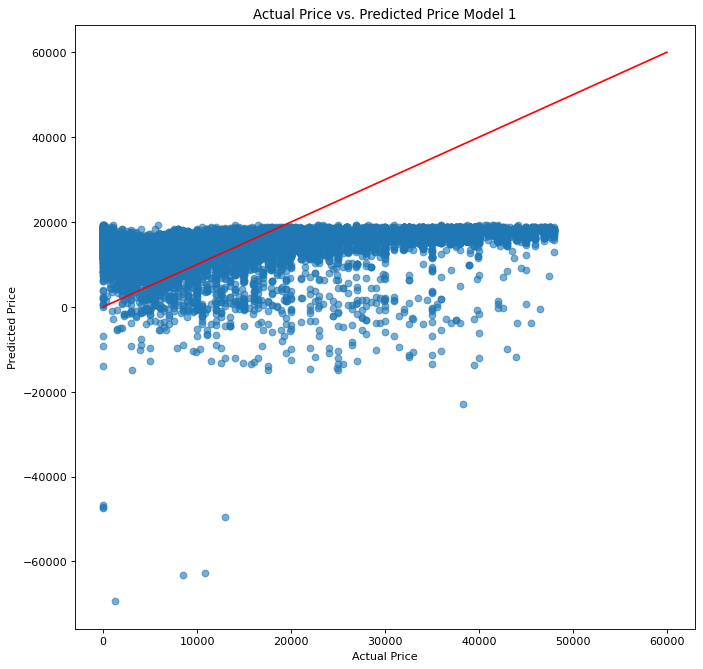

In [210]:
plt.figure(figsize = (10,10), dpi =80)
plt.scatter(x=y_num_test, y=test_preds, alpha=0.6)
plt.plot([0, 60000], [0,60000], 'r-')
plt.title("Actual Price vs. Predicted Price Model 1")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

Training score: how the model is fitted in the training data. 

Test score: The higher the score, the better the model is generalized. 

Very low training score and low test score is under-fitting. Which is expected here as we only use year and odometer to fit the data. This model was just generated for practice and representation.

As we can see from the graph it does not fit well.

### Now let's try categorical modeling

Target encoding replaces a categorical feature with average target value of all data points belonging to the category. 

To use a Pipeline in a GridSearchCV you want to preface the value in your parameter dictionary with an all lowercase version of the object. For example, to search over a ridge estimators alpha value we will create a pipeline with names scaler and ridge to use the StandardScaler followed by the Ridge regressor. To search over the ridge objects alpha paramater we write ridge__alpha

In [161]:
from sklearn.compose import make_column_transformer, TransformedTargetRegressor

categories =[]
for column in car_data.select_dtypes(include=object):
    categories.append(column)  

In [162]:
X= car_data.drop('price', axis=1)
y=car_data['price']

In [163]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)
X_train.shape
#X_test.shape

(91867, 13)

In [ ]:
scaler = StandardScaler()

preprocessor = Pipeline(
    [
        ("column_transform", ce.TargetEncoder(cols = categories)),
        ('scaler', StandardScaler()),
        ('ridge', Ridge())
    ])
param_dict = {'ridge__alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] }


In [ ]:
grid2 = GridSearchCV(preprocessor, param_grid=param_dict)
grid2.fit(X_train, y_train)

train_preds2=grid2.predict(X_train)
test_preds2= grid2.predict(X_test)
model_2_train_mse = mean_squared_error(y_train, train_preds)
model_2_test_mse = mean_squared_error(y_test, test_preds)
model_2_best_alpha = grid2.best_params_

print(f'Test MSE: {model_2_test_mse}')
print(f'Best Alpha: {list(model_2_best_alpha.values())[0]}')
print('Training set score: ' + str(grid2.score(X_train, y_train)))
print('Test set score: ' + str(grid2.score(X_test, y_test)))

In [215]:
print(f"R2: {r2_score(y_test, test_preds2)*100:.4}%")

R2: 46.19%


Text(0, 0.5, 'Predicted Price')

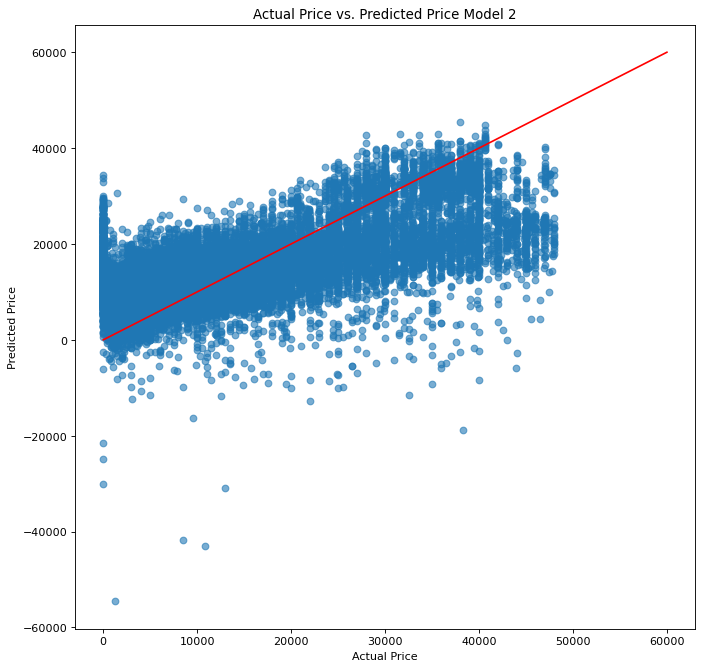

In [213]:
plt.figure(figsize = (10,10), dpi =80)
plt.scatter(x=y_test, y=test_preds2, alpha=0.6)
plt.plot([0, 60000], [0,60000], 'r-')
plt.title("Actual Price vs. Predicted Price Model 2")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

#### Repeating the model above but a slight different method to remove warnings

In [ ]:
X_train1, X_test1, y_train1, y_test1=train_test_split(X,y, test_size=0.3, random_state=0)
X_train.shape

scaler = StandardScaler()
transformer = TransformedTargetRegressor(regressor=Ridge())

preprocessor1 = Pipeline(
    [
        ("column_transform", ce.TargetEncoder(cols = categories)),
        ('scaler', StandardScaler()),
    ])
param_dict = {'regressor__alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] }


In [293]:
grid5 = GridSearchCV(transformer, param_grid=param_dict)
model5=make_pipeline(preprocessor1, grid5)
grid5=model5.fit(X_train1, y_train1)

train_preds5=grid5.predict(X_train1)
test_preds5= grid5.predict(X_test1)
model_5_train_mse = mean_squared_error(y_train1, train_preds5)
model_5_test_mse = mean_squared_error(y_test1, test_preds5)

print(f'Test MSE: {model_5_test_mse}')
print(f'Best Alpha: {list(model_5_best_alpha.values())[0]}')
print('Training set score: ' + str(grid5.score(X_train1, y_train1)))
print('Test set score: ' + str(grid5.score(X_test1, y_test1)))
print(f"R2: {r2_score(y_test1, test_preds5)*100:.4}%")

Test MSE: 72032734.99578267
Best Alpha: 100
Training set score: 0.46374065904117034
Test set score: 0.4657737480390959
R2: 46.58%


### Model 3

    Let's try Target Encoding with Sequential Selection with Lasso, Scaling and ridge. We will also add scoring in Grid Search CV

In [ ]:
import scipy as sp
X_train2, X_test2, y_train2, y_test2=train_test_split(X,y, test_size=0.3, random_state=0)

scaler = StandardScaler()
log_transform = TransformedTargetRegressor(regressor = Ridge(), transformer = StandardScaler())

seq_selector = Pipeline([('selector', SequentialFeatureSelector(Lasso(), n_features_to_select = 12))])

preprocessor = Pipeline(
    [("column_transform", ce.TargetEncoder(cols = categories, verbose=3)),
    ('scaler', StandardScaler())])
param_dict = {'regressor__alpha': [ 0.0001, 0.001, 0.01, 0.1, 100, 1000, 10000] }


In [291]:
grid3 = GridSearchCV(log_transformer, param_grid=param_dict, cv=5,
                    scoring=('r2', 'neg_mean_absolute_error'),
                    refit='neg_mean_absolute_error')
model3=make_pipeline(preprocessor1,seq_selector, grid3)
grid3=model3.fit(X_train2, y_train2)

train_preds3=grid3.predict(X_train2)
test_preds3= grid3.predict(X_test2)
model_3_train_mse = mean_squared_error(y_train2, train_preds3)
model_3_test_mse = mean_squared_error(y_test2, test_preds3)
#model_5_best_alpha = grid5.best_params_

print(f'Test MSE: {model_3_test_mse}')
print(f'Best Alpha: {list(model_3_best_alpha.values())[0]}')
print('Training set score: ' + str(grid3.score(X_train2, y_train2)))
print('Test set score: ' + str(grid5.score(X_test2, y_test2)))
print(f"R2: {r2_score(y_test2, test_preds3)*100:.4}%")

Test MSE: 72108690.87875488
Best Alpha: 1000.0
Training set score: -6213.154450031672
Test set score: 0.4659167625838996
R2: 46.52%


Text(0, 0.5, 'Predicted Price')

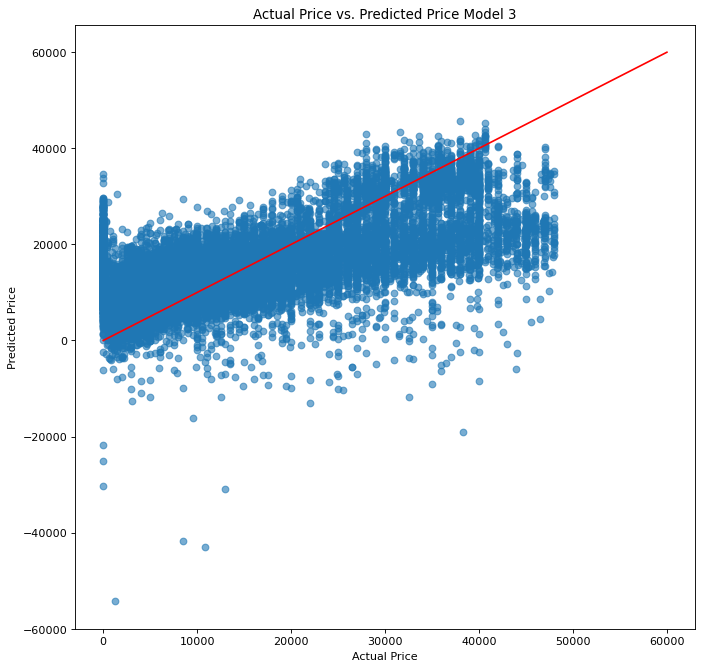

In [270]:
plt.figure(figsize = (10,10), dpi =80)
plt.scatter(x=y_test2, y=test_preds3, alpha=0.6)
plt.plot([0, 60000], [0,60000], 'r-')
plt.title("Actual Price vs. Predicted Price Model 3")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

I have built 3 models.

The first was just for practice purposes using numerical data. As expected, the model performance was extremely low. With the following information:

    Test MSE: 118805993.95177384
    Best Alpha: 100.0
    Training set score: 0.11296720989770215
    Test set score: 0.12188239664954037
    R2: 12.19%

The second performed the best out of all 3 models. 

    Test MSE: 72032734.99578267
    Best Alpha: 100
    Training set score: 0.46374065904117034
    Test set score: 0.4657737480390959
    R2: 46.58%

The last performed similar to the second model, although slightly worse.

    Test MSE: 72108690.87875488
    Best Alpha: 1000.0
    Training set score: -6213.154450031672
    Test set score: 0.4659167625838996
    R2: 46.52%
    
These scores could be better, initially I was aiming for an 80% R2 score. Given more time I would go back to the data exploration phase and clean the data further. I would also try another model.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

We can develop an application for the client where they can assess a price of the car. Given the larger error, they can record the difference between the model prediction and sales price and we can further improve the accuracy of the model. 